In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('../data/mtDNA_DSB_5k_clustered_LLM_anno_with_counts.h5ad')

In [3]:
adata = adata[adata.obs.cell_class.str.contains('ligo')]

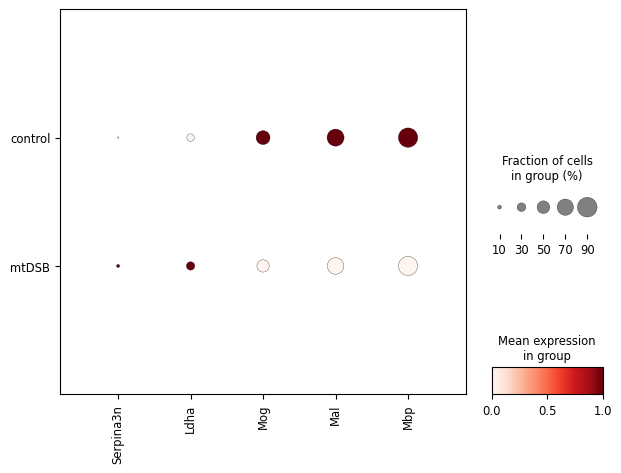

In [4]:
sc.pl.dotplot(
        adata,
        var_names=['Serpina3n','Ldha','Mog','Mal','Mbp'],
        groupby="condition",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        #categories_order = order,
        dendrogram=False,
        figsize=(7, 5)
    )

/Users/chrislangseth/miniforge3/envs/tf_sonoma_clean/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:667: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


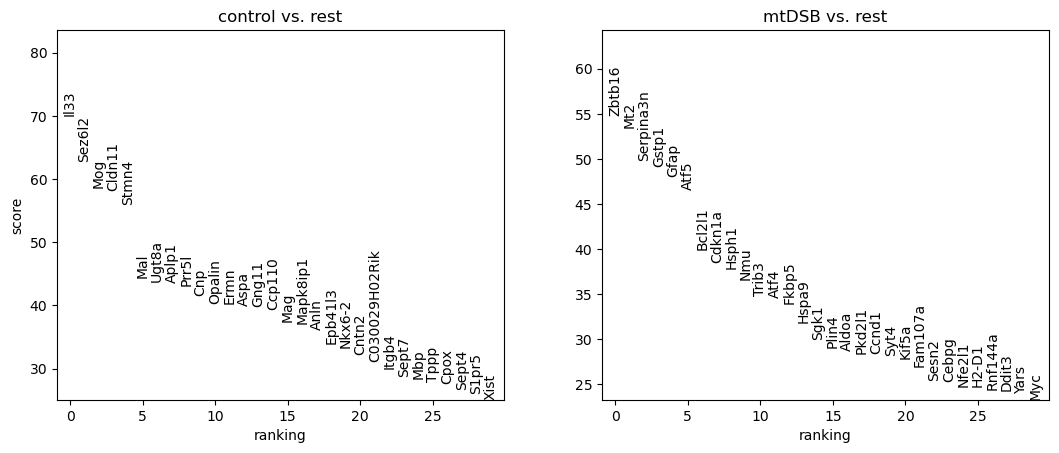

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,control,Il33,70.065208,1.815389,0.0,0.0
1,control,Sez6l2,62.779003,0.888726,0.0,0.0
2,control,Mog,58.571541,0.459648,0.0,0.0
3,control,Cldn11,58.173210,0.421971,0.0,0.0
4,control,Stmn4,55.916763,0.366196,0.0,0.0


In [5]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata, groupby="condition", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False, fontsize = 10)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

In [6]:
adata.obs['cond_age'] = adata.obs['condition'].astype(str) + '_' +adata.obs['age'].astype(str)

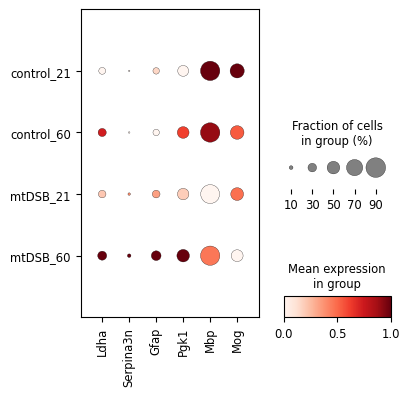

In [7]:
sc.pl.dotplot(
        adata,
        var_names=['Ldha','Serpina3n','Gfap','Pgk1','Mbp','Mog'],
        groupby="cond_age",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        #categories_order = order,
        dendrogram=False,
        figsize=(4, 4)
    )

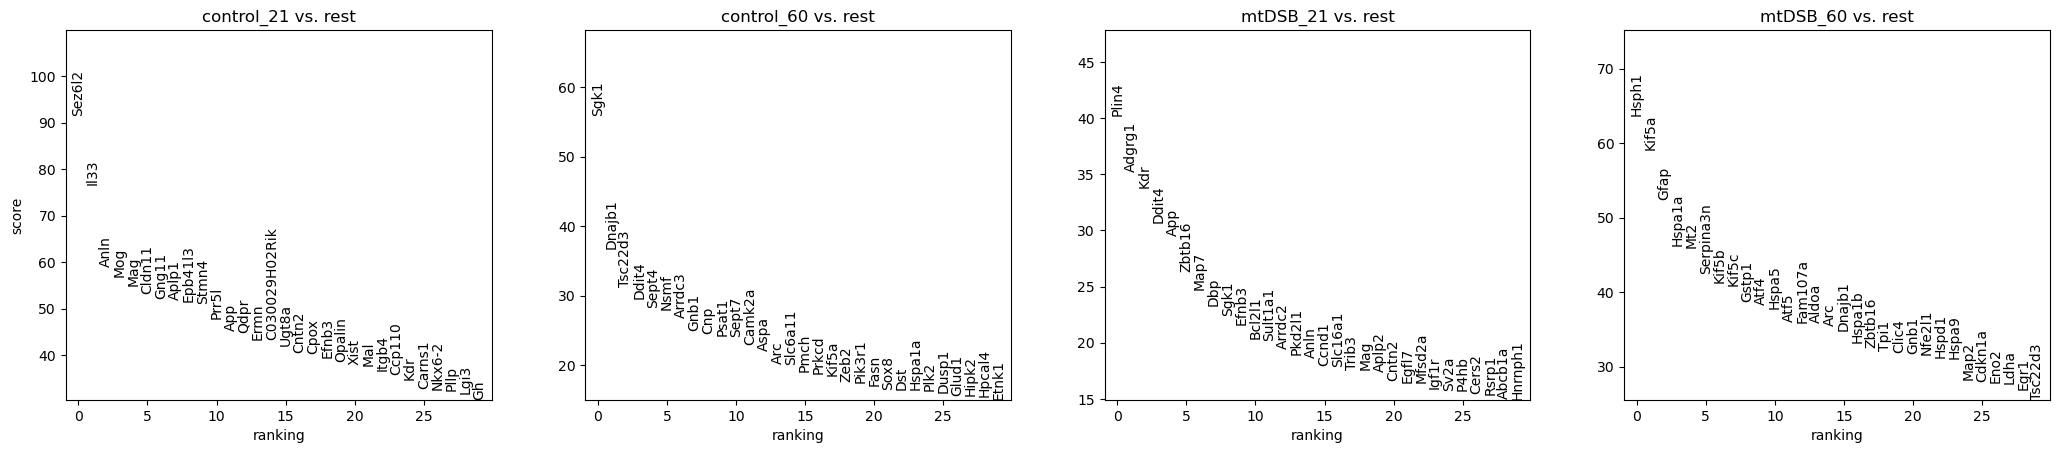

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,control_21,Sez6l2,91.565460,1.631245,0.0,0.0
1,control_21,Il33,76.751778,2.467967,0.0,0.0
2,control_21,Anln,58.932407,1.010088,0.0,0.0
3,control_21,Mog,56.940147,0.520460,0.0,0.0
4,control_21,Mag,54.944695,0.543264,0.0,0.0


In [8]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata, groupby="cond_age", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False, fontsize = 10)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

In [9]:
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,control_21,Sez6l2,91.565460,1.631245,0.0,0.0
1,control_21,Il33,76.751778,2.467967,0.0,0.0
2,control_21,Anln,58.932407,1.010088,0.0,0.0
3,control_21,Mog,56.940147,0.520460,0.0,0.0
4,control_21,Mag,54.944695,0.543264,0.0,0.0
...,...,...,...,...,...,...
20399,mtDSB_60,Cldn11,-63.997940,-0.508147,0.0,0.0
20400,mtDSB_60,Mag,-64.585571,-0.587860,0.0,0.0
20401,mtDSB_60,Anln,-68.558220,-1.130816,0.0,0.0
20402,mtDSB_60,Mog,-70.012299,-0.602097,0.0,0.0


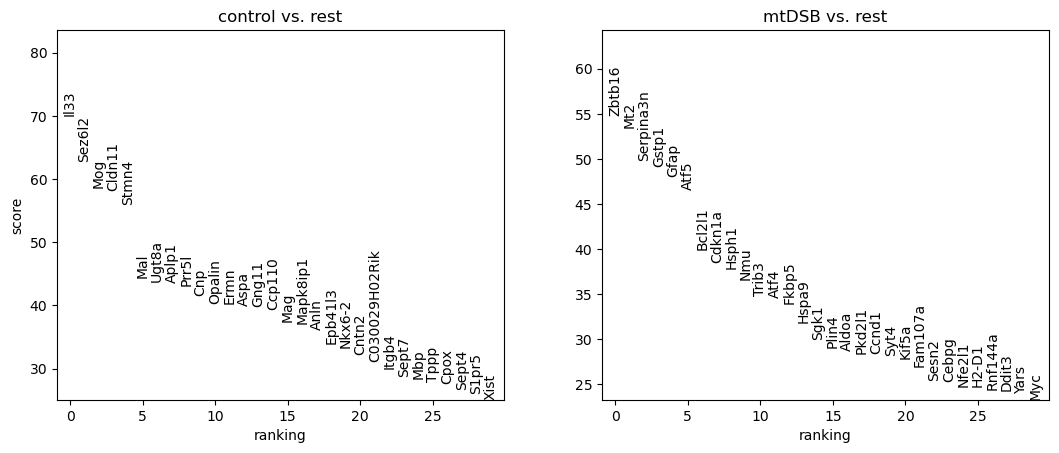

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,control,Il33,70.065208,1.815389,0.0,0.0
1,control,Sez6l2,62.779003,0.888726,0.0,0.0
2,control,Mog,58.571541,0.459648,0.0,0.0
3,control,Cldn11,58.173210,0.421971,0.0,0.0
4,control,Stmn4,55.916763,0.366196,0.0,0.0


In [10]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata, groupby="condition", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False, fontsize = 10)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

In [11]:
markers[markers['names'] == 'Ldha']

,group,names,scores,logfoldchanges,pvals,pvals_adj
4995,control,Ldha,-13.629671,-0.166456,2.762461e-42,7.828509e-41
5206,mtDSB,Ldha,13.629671,0.166456,2.762461e-42,7.828509e-41


60


/Users/chrislangseth/miniforge3/envs/tf_sonoma_clean/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:667: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


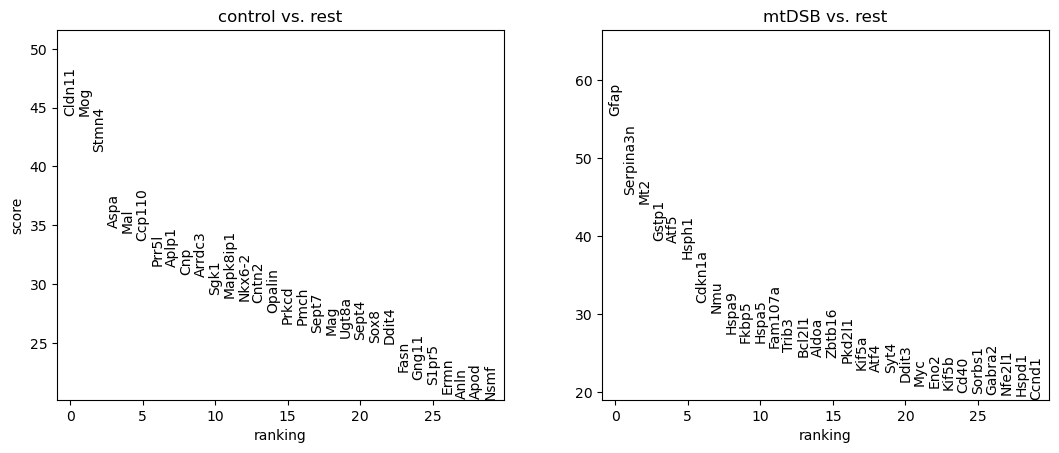

21


/Users/chrislangseth/miniforge3/envs/tf_sonoma_clean/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:667: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


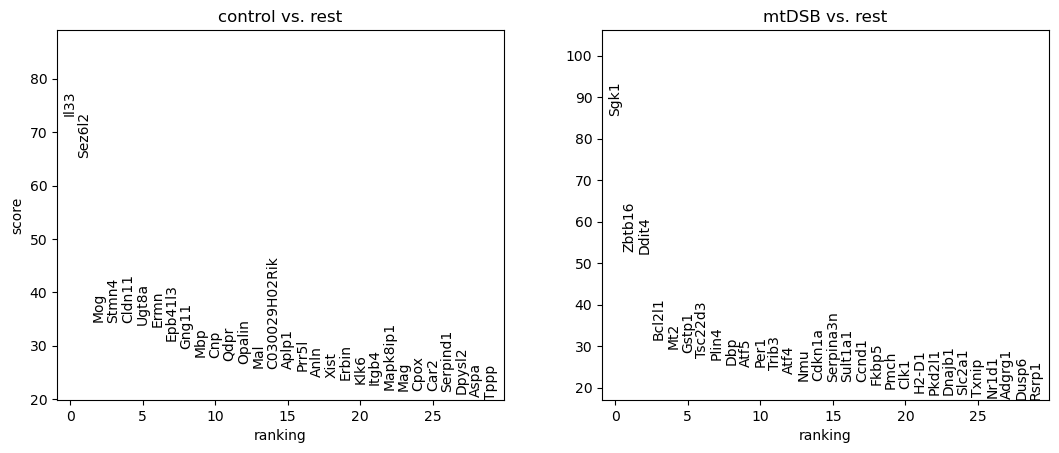

In [12]:
for age in adata.obs['age'].unique():
    print(age)
    adata_sub = adata[adata.obs['age'] == age]
    # --- Find marker genes per cluster ---
    sc.tl.rank_genes_groups(adata_sub, groupby="condition", method="t-test")
    sc.pl.rank_genes_groups(adata_sub, n_genes=30, sharey=False, fontsize = 10)
    
    # get a tidy table of top markers
    markers = sc.get.rank_genes_groups_df(adata_sub, group=None)
    markers.head()

In [13]:
adata.layers[]

SyntaxError: invalid syntax (3908942632.py, line 1)

In [137]:
ad.layers['counts']

<249993x5101 sparse matrix of type '<class 'numpy.float32'>'
	with 100113204 stored elements in Compressed Sparse Row format>

In [ ]:
import scanpy as sc
import pandas as pd

ad = adata.copy()

# make sure metadata columns are clean
ad.obs['age'] = ad.obs['age'].astype(int)
ad.obs['condition'] = ad.obs['condition'].astype(str).str.strip().str.lower()

# build a new AnnData with counts as the "raw" slot
ad_raw = sc.AnnData(X=ad.layers["counts"], obs=ad.obs.copy(), var=ad.var.copy())
ad.raw = ad_raw

def de_condition_within_age(ad, age_val):
    """mtDSB vs control at a given age."""
    ad_sub = ad[ad.obs['age'] == int(age_val)].copy()
    ad_sub = ad_sub[ad_sub.obs['condition'].isin(['control','mtdsb'])].copy()
    ad_sub.obs['condition'] = pd.Categorical(
        ad_sub.obs['condition'], categories=['control','mtdsb']
    )
    sc.tl.rank_genes_groups(
        ad_sub,
        groupby='condition',
        reference='control',
        method='wilcoxon',
        use_raw=True
    )
    df = sc.get.rank_genes_groups_df(ad_sub, group=None)
    df['contrast'] = f"mtDSB_vs_control@{age_val}"
    return df

# Run DE
de_21 = de_condition_within_age(ad, 21)
de_60 = de_condition_within_age(ad, 60)

print("Top DE genes at 21d:")


In [149]:
# Example metabolic modules
glycolysis = ["Gapdh","Eno1","Pkm","Ldha","Pgk1","Pfkp","Aldoa","Tpi1","Gpi1","Pdk1"]
tca_cycle = ["Idh1","Idh2","Idh3a","Idh3b","Idh3g","Sdha","Sdhb","Sdhc","Ogdh","Mdh2"]
oxphos = ["Ndufs1","Ndufs4","Ndufv2","Uqcrc1","Uqcrfs1","Cox4i1","Cox7a1","Atp5f1","Atp5o"]
lactate_shuttle = ["Slc16a1","Slc16a3","Ldha","Ldhb"]
lipid_metabolism = ["Abca1","Hmgcr","Apoe","Soat1","Cyp46a1"]

In [150]:
def filter_metabolic(de_df, gene_lists):
    metabolic_genes = set().union(*gene_lists.values())
    return de_df[de_df["names"].isin(metabolic_genes)].copy()

gene_sets = {
    "Glycolysis": glycolysis,
    "TCA cycle": tca_cycle,
    "OXPHOS": oxphos,
    "Lactate shuttle": lactate_shuttle,
    "Lipid metabolism": lipid_metabolism
}

# Example: check DE in 21d mtDSB vs control
met_21 = filter_metabolic(de_21, gene_sets)
met_60 = filter_metabolic(de_60, gene_sets)

print("21d metabolic DE genes:\n", met_21[["names","logfoldchanges","pvals_adj"]])
print("60d metabolic DE genes:\n", met_60[["names","logfoldchanges","pvals_adj"]])

21d metabolic DE genes:
         names  logfoldchanges     pvals_adj
14      Aldoa        0.432280  2.091002e-65
69       Tpi1        0.263143  7.365616e-25
107     Abca1        0.577062  9.325701e-21
115      Gpi1        0.219647  7.593945e-20
118      Pgk1        0.200581  1.868458e-19
132      Ldha        0.243126  1.510597e-17
165     Atp5o        0.173402  8.216183e-15
189      Sdhb        0.167513  2.901432e-13
197      Sdha        0.135736  1.160802e-12
246      Ogdh        0.198495  1.892043e-10
274      Pfkp        0.223950  9.656744e-10
295       Pkm        0.141855  5.207722e-09
389      Idh2        0.218975  4.711524e-07
717      Sdhc        0.088588  6.049240e-04
822    Ndufs1        0.096545  1.845455e-03
1085   Ndufv2        0.161557  1.760419e-02
1175     Eno1        0.229129  3.102537e-02
1286   Atp5f1        0.047060  6.832968e-02
2021  Slc16a3        0.294264  5.605688e-01
2078     Ldhb        0.061981  6.185622e-01
2083   Ndufs4        0.126463  6.255955e-01
2247  S

In [151]:
met_60.sort_values(by = 'logfoldchanges', ascending = False)

,names,scores,logfoldchanges,pvals,pvals_adj,contrast
6,Aldoa,29.294701,0.697300,1.211559e-188,6.866847e-186,mtDSB_vs_control@60
312,Abca1,7.908689,0.452988,2.601142e-15,3.823754e-14,mtDSB_vs_control@60
26,Atp5o,19.360764,0.375630,1.654141e-83,2.343826e-81,mtDSB_vs_control@60
3873,Cox7a1,0.018058,0.372179,9.855927e-01,9.999791e-01,mtDSB_vs_control@60
34,Tpi1,17.555672,0.354136,5.382569e-69,5.603364e-67,mtDSB_vs_control@60
35,Sdha,17.531527,0.346816,8.232840e-69,8.235139e-67,mtDSB_vs_control@60
45,Pgk1,15.865723,0.305101,1.094505e-56,9.004952e-55,mtDSB_vs_control@60
117,Gpi1,11.830159,0.275922,2.726234e-32,9.657305e-31,mtDSB_vs_control@60
93,Ldhb,12.837237,0.273321,1.014293e-37,4.347823e-36,mtDSB_vs_control@60
97,Ldha,12.723795,0.269091,4.361506e-37,1.808784e-35,mtDSB_vs_control@60


In [154]:
df

,expr,condition


In [159]:
ad_60.obs.cond_age.unique()

['control_60', 'mtDSB_60']
Categories (2, object): ['control_60', 'mtDSB_60']